**LAXMI YADAHALLI**


**GRIPJAN2021**

**Task-7**

**STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS**

In [ ]:
pip install yfinance


     |████████████████████████████████| 5.5MB 5.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=8d156c31d92aa7e0fd6325e0d5eed92f579b4f24a147d41775d3cd0bb19b51a9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=e96aabdba41895494ab6f91e6016ab8fab787f078595b4b681dc57e9096774e2
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [ ]:
#importing the libraries for downloading stock prices
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
df = yf.download('AAPL',start='2008-08-08', 
                      end='2016-07-01', 
                      progress=False )

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-08,5.852143,6.058928,5.848214,6.055357,5.181238,713997200
2008-08-11,6.073928,6.303571,6.059643,6.198571,5.303779,891304400
2008-08-12,6.197143,6.403214,6.196786,6.311786,5.400651,836278800
2008-08-13,6.356429,6.428571,6.282143,6.403572,5.479187,842346400
2008-08-14,6.368928,6.444643,6.351429,6.404286,5.479797,711300800


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import re
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 5.3MB/s 


In [ ]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [ ]:
#forecasting of the apple shares
apple=df
apple
apple.to_csv('appleshare.csv')

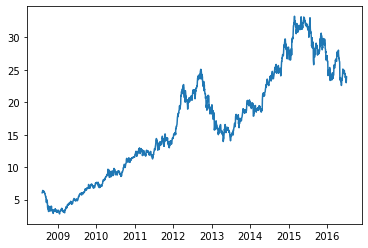

In [ ]:
#let us check whether the model can be used for time series analysis

plt.plot(apple['Close'])
#after the plotting we understand that the plot of close proces has a trend hence arima analysis can be applied

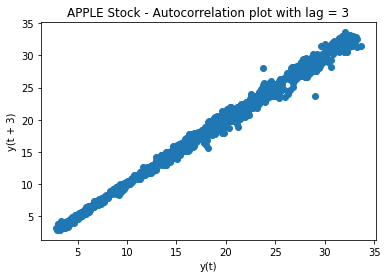

In [ ]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(apple['Open'], lag=3)
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.show()

In [ ]:
apple_stock=apple[['Close']]
apple_stock

,Close
Date,
2008-08-08,6.055357
2008-08-11,6.198571
2008-08-12,6.311786
2008-08-13,6.403572
2008-08-14,6.404286
...,...
2016-06-24,23.350000
2016-06-27,23.010000
2016-06-28,23.397499


In [ ]:
#now divide the apple_stock to training and testing set
#train the arima model using the data and do forecast or prediction on the test data and then validate it by using rms score
train_apple_stock=apple_stock.iloc[:1099]
test_apple_stock=apple_stock.iloc[1099:]

In [ ]:
train_apple_stock

,Close
Date,
2008-08-08,6.055357
2008-08-11,6.198571
2008-08-12,6.311786
2008-08-13,6.403572
2008-08-14,6.404286
...,...
2012-12-12,19.250000
2012-12-13,18.917500
2012-12-14,18.206785


In [ ]:
test_apple_stock

,Close
Date,
2012-12-19,18.796785
2012-12-20,18.633215
2012-12-21,18.547501
2012-12-24,18.577499
2012-12-26,18.321428
...,...
2016-06-24,23.350000
2016-06-27,23.010000
2016-06-28,23.397499


In [ ]:
model_forecast = auto_arima(train_apple_stock, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-46.905, BIC=-21.949, Fit time=8.774 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2570.368, BIC=2580.351, Fit time=0.322 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=254.984, BIC=274.949, Fit time=3.714 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1609.610, BIC=1629.575, Fit time=3.340 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=-45.274, BIC=-15.327, Fit time=9.079 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=568.243, BIC=588.208, Fit time=1.085 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=-45.250, BIC=-15.303, Fit time=30.674 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=-49.839, BIC=-14.901, Fit time=24.928 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1594.211, BIC=1624.158, Fit time=15.391 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_o

In [ ]:
model_forecast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1099
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                  34.481
Date:                                 Fri, 20 Nov 2020   AIC                            -52.962
Time:                                         17:15:03   BIC                            -13.033
Sample:                                              0   HQIC                           -37.848
                                                - 1099                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.003      0.634      0.526      -0.003       0.007
ar.L1          0.0849      0.062      1.380      0.167      -0.036       0.206
ar.L2          0.9100      0.063     14.506      0.000       0.787       1.033
ma.L1          0.8851      0.072     12.331      0.000       0.744       1.026
ar.S.L12      -0.9749      0.046    -21.275      0.000      -1.065      -0.885
ma.S.L12      -0.0493      0.733     -0.067      0.946      -1.487       1.388
ma.S.L24      -0.9502      0.702     -1.354      0.176      -2.325       0.425
sigma2         0.0523      0.038      1.381      0.167      -0.022       0.126
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):              2298.56
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               6.69   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#now use this model to do the forecast
prediction=model_forecast.predict(n_periods=889)

In [ ]:
#check the mean square error for validating how accurate are the values obtained 
def rootmeansqr_meansqr(prediction,test_apple_stock):
  sum=0
  for i in range(0,len(test_apple_stock)):
    sum+=(prediction[i]-test_apple_stock.values[i])**2
  rmse=np.sqrt(sum/len(test_apple_stock))
  mse=sum/len(test_apple_stock)
  return rmse,mse
rmse,mse=rootmeansqr_meansqr(prediction,test_apple_stock)
print("root_mean_sqare error:",rmse[0])
print("mean squre error:",mse[0])

root_mean_sqare error: 3.839085126685313
mean squre error: 14.738574609936386


In [ ]:
#converting prediction array to a pandas data frame
prediction_dataframe=pd.DataFrame(prediction,columns=['Forecast'],index=test_apple_stock.index)

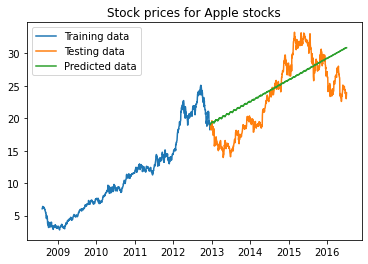

In [ ]:
#now let us plot the training,testing and prediction values over the graph
plt.plot(train_apple_stock,label='Training data')
plt.plot(test_apple_stock,label='Testing data')
plt.plot(prediction_dataframe,label='Predicted data')
plt.legend()
plt.title("Stock prices for Apple stocks")
plt.show()

In [ ]:
#now let us analyse the top headlines
headlines=pd.read_csv('Top_headlines.csv')
headlines.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [ ]:
#clean the features
#lower the case
#remove punctuation marks
#combine them into a features
import re
def combining_cleaning(headlines):
  combined=[]
  for i in range(0,len(headlines.index)):
    combined.append(' '.join(str(x).lower() for x in headlines.iloc[i,2:27]))
  for i in range(0,len(combined)):
    combined[i]=re.sub("b[(')]+",'',combined[i])
    combined[i]=re.sub("\'",'',combined[i])
    combined[i]=re.sub('b[(")]+','',combined[i])
    combined[i]=re.sub('[(")]','',combined[i])
    combined[i]=re.sub("[^a-z]"," ",combined[i])
  headlines["combined_features"]=combined
  return headlines
combining_cleaning(headlines).head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_features
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",why wont america and nato help us if they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",remember that adorable year ol

In [ ]:
headlines_combined=[]
for i in range(0,len(headlines.index)):
  headlines_combined.append(headlines['combined_features'][i])
countvector=CountVectorizer()
count_features=countvector.fit_transform(headlines_combined)

In [ ]:
#splitting the data into test and training data
X=headlines[['combined_features']]
y=headlines[['Label']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train=X_train.reset_index()
X_test=X_test.reset_index()
y_train=y_train.reset_index()
y_test=y_test.reset_index()

In [ ]:
X_train

,index,combined_features
0,1694,russian official severely beaten after reporti...
1,1597,each time police shut pirate bay well multipl...
2,482,iran woman adulterer will not face stoning bp...
3,842,iranian tv airs footage of captured us drone a...
4,372,internet uprising overturns australian censors...
...,...,...
1387,835,uk experiencing the worst disruption to servic...
1388,1216,edward snowden the whistleblower behind revel...
1389,1653,study confirms that abstinence education has u...
1390,559,wikileaks ready to drop a bombshell on russia ...


In [ ]:
X_test

,index,combined_features
0,1292,irans new president yes the holocaust happen...
1,1310,china smog emergency shuts city of million ...
2,960,france to cap executive pay at state firms no...
3,107,the video the israeli army didnt want you to s...
4,1556,doctors without borders loses medics to ebol...
...,...,...
592,108,greece hinders us arms delivery to israel cana...
593,1611,most cases of cancer are the result of sheer b...
594,1415,solar power is now just as cheap as convention...
595,2,remember that adorable year old who sang at ...


In [ ]:
y_train

,index,Label
0,1694,1
1,1597,1
2,482,1
3,842,1
4,372,1
...,...,...
1387,835,1
1388,1216,0
1389,1653,1
1390,559,0


In [ ]:
y_test

,index,Label
0,1292,1
1,1310,1
2,960,0
3,107,0
4,1556,0
...,...,...
592,108,0
593,1611,1
594,1415,1
595,2,0


In [ ]:
def countfeatures_train_test(X_train,X_test):
  headlines_combined_train=[]
  headlines_combined_test=[]
  for i in range(0,len(X_train.index)):
    headlines_combined_train.append(X_train['combined_features'][i])
  for i in range(0,len(X_test.index)):
    headlines_combined_test.append(X_test['combined_features'][i])
  count_features_train=countvector.fit_transform(headlines_combined_train)
  count_features_test=countvector.transform(headlines_combined_test)
  return count_features_train,count_features_test
count_features_train,count_features_test=countfeatures_train_test(X_train,X_test)

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
randomclassifier.fit(count_features_train,y_train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predict_sent_rand=randomclassifier.predict(count_features_test)

In [ ]:
cm_rand=confusion_matrix(y_test['Label'],predict_sent_rand)
acc_score_rand=accuracy_score(y_test['Label'],predict_sent_rand)
rand_sent_report=classification_report(y_test['Label'],predict_sent_rand)
print(cm_rand)
print(acc_score_rand)
print(rand_sent_report)

[[ 59 222]
 [ 54 262]]
0.5376884422110553
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       281
           1       0.54      0.83      0.65       316

    accuracy                           0.54       597
   macro avg       0.53      0.52      0.48       597
weighted avg       0.53      0.54      0.49       597



In [ ]:
log_sent=LogisticRegression()
log_sent.fit(count_features_train,y_train['Label'])
predict_sent_log=log_sent.predict(count_features_test)

In [ ]:
cm_log=confusion_matrix(y_test['Label'],predict_sent_log)
acc_score_log=accuracy_score(y_test['Label'],predict_sent_log)
log_sent_report=classification_report(y_test['Label'],predict_sent_log)
print(cm_log)
print(acc_score_log)
print(log_sent_report)

[[124 157]
 [141 175]]
0.5008375209380235
              precision    recall  f1-score   support

           0       0.47      0.44      0.45       281
           1       0.53      0.55      0.54       316

    accuracy                           0.50       597
   macro avg       0.50      0.50      0.50       597
weighted avg       0.50      0.50      0.50       597



In [ ]:
lda_sent=LinearDiscriminantAnalysis()
lda_sent.fit(count_features_train.toarray(),y_train['Label'])
predict_sent_lda=lda_sent.predict(count_features_test.toarray())
cm_lda=confusion_matrix(y_test['Label'],predict_sent_lda)
acc_score_lda=accuracy_score(y_test['Label'],predict_sent_lda)
lda_sent_report=classification_report(y_test['Label'],predict_sent_lda)
print(cm_lda)
print(acc_score_lda)
print(lda_sent_report)

[[ 31 250]
 [ 34 282]]
0.52428810720268
              precision    recall  f1-score   support

           0       0.48      0.11      0.18       281
           1       0.53      0.89      0.67       316

    accuracy                           0.52       597
   macro avg       0.50      0.50      0.42       597
weighted avg       0.51      0.52      0.44       597



In [ ]:
decision_sent=DecisionTreeClassifier()
decision_sent.fit(count_features_train,y_train['Label'])
predict_sent_decision=decision_sent.predict(count_features_test)
cm_decision=confusion_matrix(y_test['Label'],predict_sent_decision)
acc_score_decision=accuracy_score(y_test['Label'],predict_sent_decision)
decision_sent_report=classification_report(y_test['Label'],predict_sent_decision)
print(cm_decision)
print(acc_score_decision)
print(decision_sent_report)

[[132 149]
 [167 149]]
0.47068676716917923
              precision    recall  f1-score   support

           0       0.44      0.47      0.46       281
           1       0.50      0.47      0.49       316

    accuracy                           0.47       597
   macro avg       0.47      0.47      0.47       597
weighted avg       0.47      0.47      0.47       597



In [ ]:
svm_sent=SVC()
svm_sent.fit(count_features_train,y_train['Label'])
predict_sent_svm=svm_sent.predict(count_features_test)
cm_svm=confusion_matrix(y_test['Label'],predict_sent_svm)
acc_score_svm=accuracy_score(y_test['Label'],predict_sent_svm)
svm_sent_report=classification_report(y_test['Label'],predict_sent_svm)
print(cm_svm)
print(acc_score_svm)
print(svm_sent_report)

[[  6 275]
 [  3 313]]
0.5343383584589615
              precision    recall  f1-score   support

           0       0.67      0.02      0.04       281
           1       0.53      0.99      0.69       316

    accuracy                           0.53       597
   macro avg       0.60      0.51      0.37       597
weighted avg       0.60      0.53      0.39       597



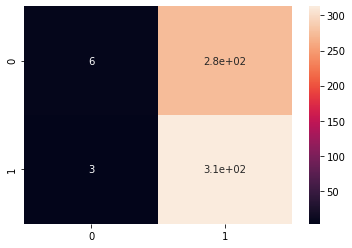

In [ ]:
sns.heatmap(cm_svm,annot=True)

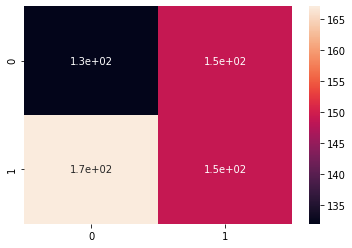

In [ ]:
sns.heatmap(cm_decision,annot=True)

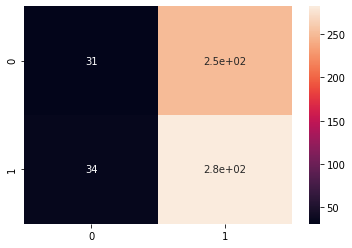

In [ ]:
sns.heatmap(cm_lda,annot=True)

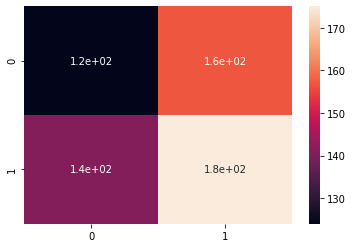

In [ ]:
sns.heatmap(cm_log,annot=True)

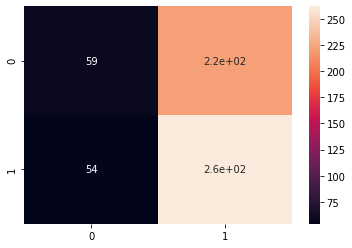

In [ ]:
sns.heatmap(cm_rand,annot=True)

In [ ]:
#now let us merge our stock prices and news headlines to get effective analysis
apple_stock=pd.read_csv('appleshare.csv')
from datetime import datetime
for i in range(0,len(apple_stock)):
  X=datetime.strptime(apple_stock['Date'][i], '%Y-%m-%d').strftime('%Y-%m-%d')
apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date.1
0,2008-08-08,5.852143,6.058928,5.848214,6.055357,5.181238,713997200,2008-08-08
1,2008-08-11,6.073928,6.303571,6.059643,6.198571,5.303779,891304400,2008-08-11
2,2008-08-12,6.197143,6.403214,6.196786,6.311786,5.400651,836278800,2008-08-12
3,2008-08-13,6.356429,6.428571,6.282143,6.403572,5.479187,842346400,2008-08-13
4,2008-08-14,6.368928,6.444643,6.351429,6.404286,5.479797,711300800,2008-08-14


In [ ]:
#now let us combine apple_stock and headlines on 'Date' 
headlines_apple=headlines.merge(apple_stock,how='inner',on='Date')

In [ ]:
headlines_apple.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_features', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Date.1'],
      dtype='object')

In [ ]:
headlines_apple.describe()

,Label,Open,High,Low,Close,Adj Close,Volume
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1.988000e+03
mean,0.535211,16.728833,16.886780,16.551152,16.720844,14.792745,4.573919e+08
std,0.498884,8.416471,8.479990,8.342657,8.410058,7.756371,3.113076e+08
min,0.000000,2.835357,2.928571,2.792857,2.792857,2.389696,5.218560e+07
25%,0.000000,9.320536,9.402946,9.203215,9.318839,7.973621,2.438428e+08
50%,1.000000,16.341249,16.440357,16.185179,16.306428,14.141393,3.888094e+08
75%,1.000000,23.724733,23.932857,23.446428,23.685357,21.274402,5.747861e+08
max,1.000000,33.615002,33.634998,32.849998,33.250000,30.182924,2.622057e+09


In [ ]:
#find the polarity and subjectivity of the combined features
polarity=[]
subjectivity=[]
negativity=[]
positivity=[]
neutrality=[]
for i in range(0,len(headlines_apple.index)):
  polarity.append(TextBlob(headlines_apple['combined_features'][i]).sentiment.polarity)
  subjectivity.append(TextBlob(headlines_apple['combined_features'][i]).sentiment.subjectivity)
  negativity.append(sid.polarity_scores(headlines_apple['combined_features'][i])['neg'])
  positivity.append(sid.polarity_scores(headlines_apple['combined_features'][i])['pos'])
  neutrality.append(sid.polarity_scores(headlines_apple['combined_features'][i])['neu'])

In [ ]:
headlines_apple['polarity']=polarity
headlines_apple['subjectivity']=subjectivity
headlines_apple['negativity']=negativity
headlines_apple['positivity']=positivity
headlines_apple['neutrality']=neutrality

In [ ]:
headlines_apple.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_features', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Date.1', 'polarity', 'subjectivity',
       'negativity', 'positivity', 'neutrality'],
      dtype='object')

In [ ]:
X_merge=headlines_apple[['Open','High','Low','Volume','polarity','subjectivity','negativity','positivity','neutrality']]
y_merge=headlines_apple[['Label']]

In [ ]:
X_merge

,Open,High,Low,Volume,polarity,subjectivity,negativity,positivity,neutrality
0,5.852143,6.058928,5.848214,713997200,-0.048568,0.267549,0.234,0.057,0.708
1,6.073928,6.303571,6.059643,891304400,0.109325,0.374806,0.187,0.101,0.712
2,6.197143,6.403214,6.196786,836278800,-0.033202,0.510370,0.135,0.052,0.813
3,6.356429,6.428571,6.282143,842346400,0.005842,0.364021,0.156,0.068,0.776
4,6.368928,6.444643,6.351429,711300800,0.049050,0.390095,0.201,0.101,0.698
...,...,...,...,...,...,...,...,...,...
1983,23.227501,23.665001,23.162500,301245600,0.036343,0.365079,0.101,0.052,0.847
1984,23.250000,23.262501,22.875000,181958400,-0.014015,0.352311,0.165,0.089,0.746
1985,23.225000,23.415001,23.035000,161779600,0.047722,0.349330,0.136,0.105,0.758
1986,23.492500,23.637501,23.407499,146124000,0.075882,0.417835,0.237,0.112,0.651


In [ ]:
y_merge

,Label
0,0
1,1
2,0
3,0
4,1
...,...
1983,0
1984,0
1985,1
1986,1


In [ ]:
X_merge_train,X_merge_test,y_merge_train,y_merge_test=train_test_split(X_merge,y_merge,test_size=0.3,random_state=0)

[[ 91 200]
 [ 93 213]]
0.509212730318258
              precision    recall  f1-score   support

           0       0.49      0.31      0.38       291
           1       0.52      0.70      0.59       306

    accuracy                           0.51       597
   macro avg       0.51      0.50      0.49       597
weighted avg       0.51      0.51      0.49       597

AxesSubplot(0.125,0.125;0.62x0.755)


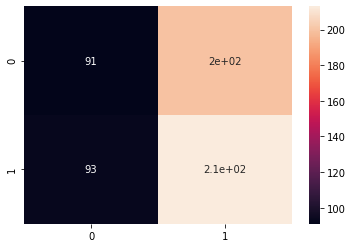

In [ ]:
from sklearn import svm
svmclf_merge=svm.SVC(kernel='rbf',degree=5,class_weight='balanced')
svmclf_merge.fit(X_merge_train,y_merge_train) 
y_pred_svm=svmclf_merge.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_svm))
print(accuracy_score(y_merge_test,y_pred_svm))
print(classification_report(y_merge_test,y_pred_svm))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_svm),annot=True))

[[126 165]
 [147 159]]
0.47738693467336685
              precision    recall  f1-score   support

           0       0.46      0.43      0.45       291
           1       0.49      0.52      0.50       306

    accuracy                           0.48       597
   macro avg       0.48      0.48      0.48       597
weighted avg       0.48      0.48      0.48       597

AxesSubplot(0.125,0.125;0.62x0.755)


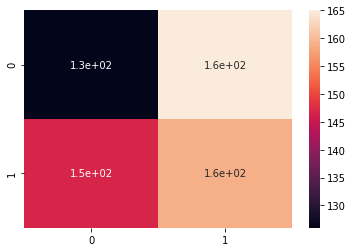

In [ ]:
decclf_merge = DecisionTreeClassifier(random_state=0)
decclf_merge.fit(X_merge_train,y_merge_train)
y_pred_dec=decclf_merge.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_dec))
print(accuracy_score(y_merge_test,y_pred_dec))
print(classification_report(y_merge_test,y_pred_dec))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_dec),annot=True))

[[ 84 207]
 [ 61 245]]
0.5510887772194305
              precision    recall  f1-score   support

           0       0.58      0.29      0.39       291
           1       0.54      0.80      0.65       306

    accuracy                           0.55       597
   macro avg       0.56      0.54      0.52       597
weighted avg       0.56      0.55      0.52       597

AxesSubplot(0.125,0.125;0.62x0.755)


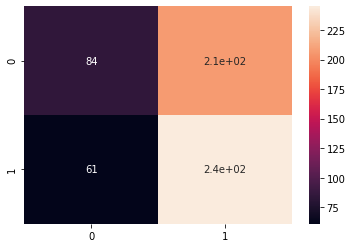

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_merge_train, y_merge_train)
y_pred_lda=clf_lda.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_lda))
print(accuracy_score(y_merge_test,y_pred_lda))
print(classification_report(y_merge_test,y_pred_lda))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_lda),annot=True))

[[  0 291]
 [  0 306]]
0.5125628140703518
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.51      1.00      0.68       306

    accuracy                           0.51       597
   macro avg       0.26      0.50      0.34       597
weighted avg       0.26      0.51      0.35       597

AxesSubplot(0.125,0.125;0.62x0.755)


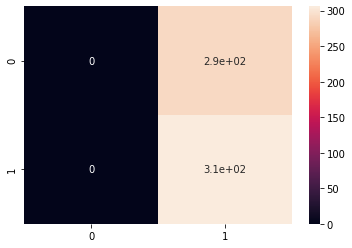

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_merge_train,y_merge_train)
y_pred_log=log.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_log))
print(accuracy_score(y_merge_test,y_pred_log))
print(classification_report(y_merge_test,y_pred_log))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_log),annot=True))

[[ 26 265]
 [ 24 282]]
0.5159128978224455
              precision    recall  f1-score   support

           0       0.52      0.09      0.15       291
           1       0.52      0.92      0.66       306

    accuracy                           0.52       597
   macro avg       0.52      0.51      0.41       597
weighted avg       0.52      0.52      0.41       597

AxesSubplot(0.125,0.125;0.62x0.755)


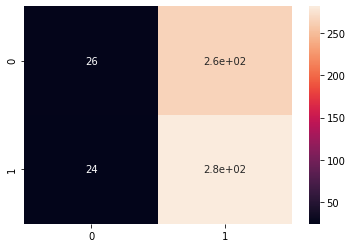

In [ ]:
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)
clf_rand.fit(X_merge_train, y_merge_train)
y_pred_rand=clf_rand.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_rand))
print(accuracy_score(y_merge_test,y_pred_rand))
print(classification_report(y_merge_test,y_pred_rand))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_rand),annot=True))